In [1]:
import os
import sys
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
example_segment = '/mnt/e/steer/comma2k19/Chunk_1/'+'b0c9d2329ad1606b2018-07-27--06-03-57/3/'
example_segment = '/mnt/e/steer/comma2k19/Chunk_1/'+'b0c9d2329ad1606b2018-08-03--10-35-16/7/'

In [3]:
can_time = np.load(example_segment+"processed_log/CAN/speed/t")
ublox_time = np.load(example_segment+"processed_log/GNSS/live_gnss_ublox/t")
qcom_time = np.load(example_segment+"processed_log/GNSS/live_gnss_qcom/t")
processed_time = np.load(example_segment+"global_pose/frame_times")

In [4]:
can_speed = np.load(example_segment+"processed_log/CAN/speed/value")
ublox_speed = np.load(example_segment+"processed_log/GNSS/live_gnss_ublox/value")[:,2]
qcom_speed = np.load(example_segment+"processed_log/GNSS/live_gnss_qcom/value")[:,2]
processed_speed = np.linalg.norm(
    np.load(example_segment+"global_pose/frame_velocities"), axis=1)

can_speed.shape, ublox_speed.shape, qcom_speed.shape, processed_speed.shape

((4973, 1), (595,), (30,), (1200,))

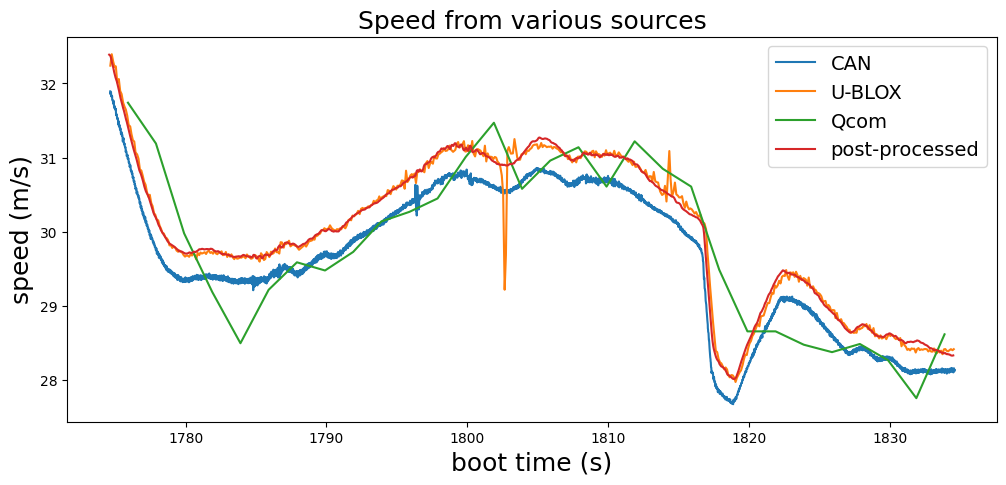

In [5]:
plt.figure(figsize=(12, 5))

plt.plot(can_time, can_speed, label="CAN")
plt.plot(ublox_time, ublox_speed, label="U-BLOX")
plt.plot(qcom_time, qcom_speed, label="Qcom")
plt.plot(processed_time, processed_speed, label="post-processed")

plt.legend(fontsize=14);
plt.title('Speed from various sources', fontsize=18);
plt.xlabel('boot time (s)', fontsize=18);
plt.ylabel('speed (m/s)', fontsize=18);

In [6]:
import sys
sys.path.insert(1, '../src/')
import lib.orientation as orient

Text(0, 0.5, 'Euler angle (deg)')

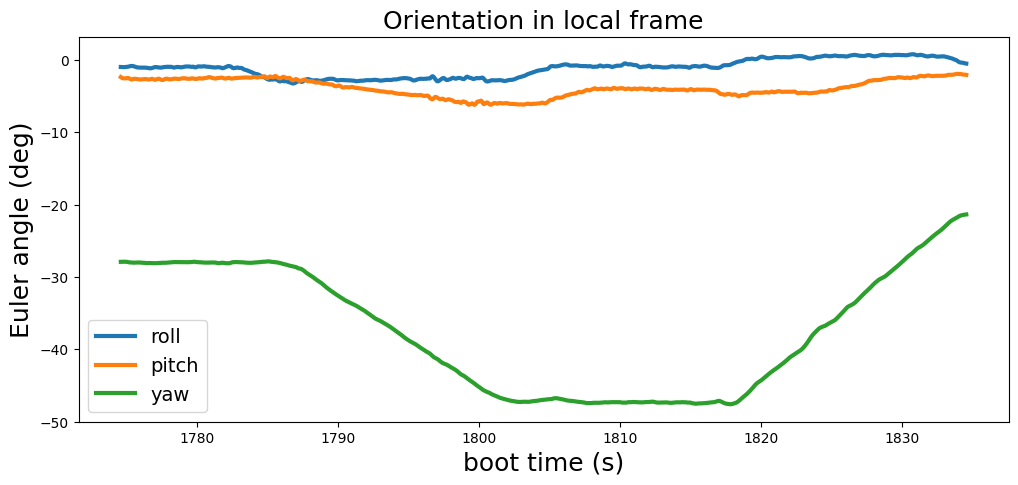

In [7]:
frame_times = np.load(example_segment + 'global_pose/frame_times')
frame_positions = np.load(example_segment + 'global_pose/frame_positions')
frame_orientations = np.load(
    example_segment + 'global_pose/frame_orientations')
euler_angles_ned_deg = (180/3.141516)*orient.ned_euler_from_ecef(
    frame_positions[0], orient.euler_from_quat(frame_orientations))

plt.figure(figsize=(12,5))
plt.plot(frame_times, euler_angles_ned_deg[:, 0], label='roll', linewidth=3)
plt.plot(frame_times, euler_angles_ned_deg[:, 1], label='pitch', linewidth=3)
plt.plot(frame_times, euler_angles_ned_deg[:, 2], label='yaw', linewidth=3)
plt.title('Orientation in local frame', fontsize=18)
plt.legend(fontsize=14)
plt.xlabel('boot time (s)', fontsize=18)
plt.ylabel('Euler angle (deg)', fontsize=18)